In [150]:
import pandas as pd 
import numpy as np 
import os
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')

In [151]:
meteo_orly = pd.read_csv(os.path.join("..", "Datasets", "meteo_orly.csv"))
meteo_paris = pd.read_csv(os.path.join("..", "Datasets", "meteo_paris.csv"))

In [152]:
meteo_orly = meteo_orly[['date', 't', 'vv']] # Find out what vv is 
meteo_orly['t'] = (meteo_orly['t'] - 273.15)/15
meteo_orly['vv'] = meteo_orly['vv']/150
meteo_paris = meteo_paris[['datetime', 'precip']]


<Axes: xlabel='precip', ylabel='Count'>

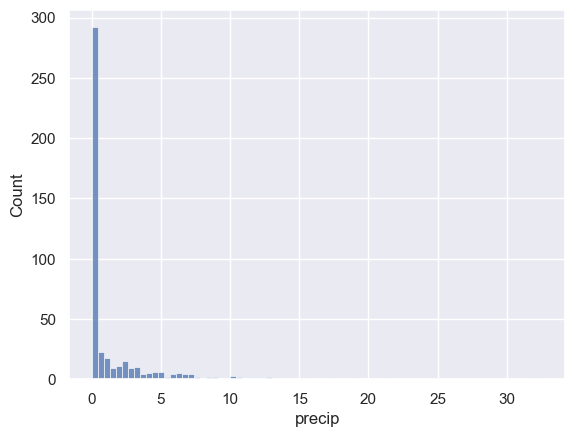

In [153]:
sns.histplot(data = meteo_paris, x = 'precip')

In [154]:
# Making 3 categories of precipitation 
# We ordinal encode them as there is some notion of ordering 
# Change categories as required

conditions = [
    (meteo_paris['precip'] == 0),
    ((meteo_paris['precip'] > 0) & (meteo_paris['precip'] < 2)),
    (meteo_paris['precip'] >= 2)
]
values = [1, 2, 3]

meteo_paris['precipitation_level'] = np.select(conditions, values, default=0)

meteo_paris.drop('precip', axis=1, inplace=True)

In [155]:

meteo_orly['date'] = pd.to_datetime(meteo_orly['date'])
meteo_orly['date_only'] = meteo_orly['date'].dt.date
meteo_paris['date_only'] = pd.to_datetime(meteo_paris['datetime']).dt.date


meteo = pd.merge(meteo_orly, meteo_paris, on='date_only', how='outer')

# Dump unnecessary columns

meteo.drop(['date_only', 'datetime'], axis=1, inplace=True)


In [162]:
meteo_orly.tail()

,date,t,vv,date_only
3317,2020-09-30 09:00:00,1.120000,120.000000,2020-09-30
3318,2020-09-30 12:00:00,1.260000,166.666667,2020-09-30
3319,2020-09-30 15:00:00,1.226667,166.666667,2020-09-30
3320,2020-09-30 18:00:00,1.133333,272.133333,2020-09-30
3321,2020-09-30 21:00:00,1.013333,168.333333,2020-09-30


In [161]:
meteo.head()

# Note there is some NaNs in here as the date ranges dont really match up 

,date,t,vv,precipitation_level
0,2021-01-01 00:00:00,-0.026667,6.600000,2
1,2021-01-01 03:00:00,-0.126667,1.400000,2
2,2021-01-01 06:00:00,-0.080000,24.400000,2
3,2021-01-01 09:00:00,-0.046667,23.333333,2
4,2021-01-01 12:00:00,0.253333,53.333333,2


In [157]:
#Classes are pretty balanced

print(meteo['precipitation_level'].value_counts())


2    1430
1    1129
3     803
Name: precipitation_level, dtype: int64


## Now we look at Covid-19 cases